# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set()
%matplotlib inline

In [2]:
df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


### Question 1: Is the distribution of body temperatures normal? 

#### Graphic Checks 

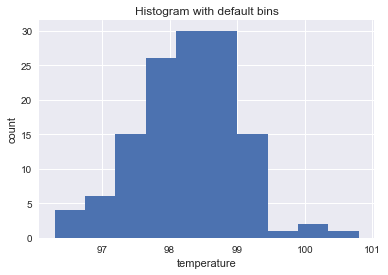

In [4]:
plt.hist(df.temperature)
plt.xlabel('temperature')
plt.ylabel('count')
plt.title('Histogram with default bins');

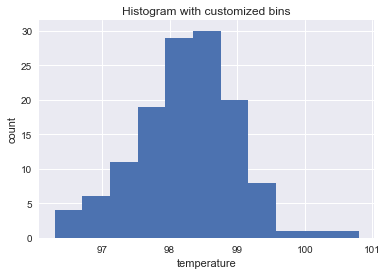

In [5]:
n_bins = int(np.sqrt(len(df)))

plt.hist(df.temperature, bins=n_bins)
plt.xlabel('temperature')
plt.ylabel('count')
plt.title('Histogram with customized bins');

From the histogram, it seems that the distribution of body temperatures is right skewed. 

In [6]:
from statsmodels.graphics.gofplots import qqplot

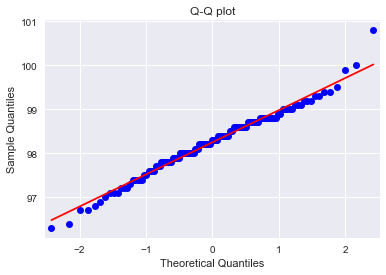

In [7]:
qqplot(df.temperature, line='s')
plt.title('Q-Q plot');

From the QQ plot, the scatter plot of points closely fits the diagonal line, although there are a few deviations at the top right of the plot. 

#### Statistical Tests

In [8]:
# Shapiro-Wilk Test
from scipy.stats import shapiro
stat, p = shapiro(df.temperature)
print('Statistics is {}, p-value is {}'.format(stat, p))

Statistics is 0.9865770936012268, p-value is 0.233174666762352


From the p-value of Shapiro-Wilk Test, we fail to reject the null that data is normally distributed. Thus from the result of this test, data is likely drawn from a Normal distribution.

In [9]:
# Anderson-Darling Test
from scipy.stats import anderson
anderson(df.temperature)

AndersonResult(statistic=0.52010388267143526, critical_values=array([ 0.56 ,  0.637,  0.765,  0.892,  1.061]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

Null is failed to be rejected if the calculated statistic is less than the critical value. At the most common significant levels, we cannot reject the null hypothesis. Thus the test shows that the data follows a normal distribution.

### Question2: Is the sample size large? Are the observations independent?

In [10]:
df.shape

(130, 3)

There are 130 observations, the sample is said to be sufficiently large if sample size $n\geq30$. We can say the sample size for this case is large for applying the CLT. It is also reasonable to assume the observations are independent. The body temperature of one person is unrelated to the body temperature of another person unless under certain conditions such as the same person's body temperatures are recorded repeatedly in this data set or people in the data set are close to each other such that one is having a cold then others are also likely to catch a cold. 

### Question 3:  Is the true population mean really 98.6 degrees F?

#### Bootstrap Hypothesis Test

In [11]:
np.random.seed(42)

In [12]:
def draw_bs_reps(data, func, size):
    '''Draw bootstrap replicates'''
    bs_reps = np.empty(size)
    
    for i in range(size):
        bs_reps[i] = func(np.random.choice(data, size=len(data)))
    
    return bs_reps

In [13]:
body_temp = df.temperature

# observed mean 
mean_ob = np.mean(body_temp)

# translate the data such that the mean is 98.6
body_temp_shifted = body_temp - np.mean(body_temp) + 98.6

# Draw bootstrap replicates of traslated body temperature
body_temp_shifted_reps = draw_bs_reps(body_temp_shifted, np.mean, size=10000)

dev = abs(98.6 - mean_ob)

# Compute fraction of replicates that are not equal to 98.6: p
p = np.sum((body_temp_shifted_reps > 98.6 + dev) | 
           (body_temp_shifted_reps < 98.6 - dev)) / len(body_temp_shifted_reps)

print('p = ', p)

p =  0.0


It is so extreme, that in 10000 repetition, we never saw numbers that extreme. 

#### t-test

In [14]:
from scipy.stats import ttest_1samp
ttest = ttest_1samp(body_temp, 98.6)
print('t statistic is {}, p-value is {}'.format(ttest[0], ttest[1]))

t statistic is -5.4548232923645195, p-value is 2.4106320415561276e-07


- As we can see, the p-value is not exactly 0, but is extremely small. <br>
- I am using a one-sample test, because the goal is to test if the mean of this sample is equal to certain number, not to test the difference of means between two samples. <br>
- In this situation, it is appropriate to use t statistic becuase population variance is unknow. While our sample size is over 30, we'll expect to get the same result using either statistic. <br>
- Next let's try to use the z statistic.

In [15]:
from statsmodels.stats.weightstats import ztest
ztest = ztest(body_temp, value=98.6)
print('z statistic is {}, p-value is {}'.format(ztest[0], ztest[1]))

z statistic is -5.4548232923645195, p-value is 4.9021570141012155e-08


### Question 4:  Draw a small sample of size 10 from the data and repeat both frequentist tests. 

In [16]:
body_temp_sample_10 = np.random.choice(body_temp, size=10)

In [17]:
# Use t statistic
ttest = ttest_1samp(body_temp_sample_10, 98.6)
print('t statistic is {}, p-value is {}'.format(ttest[0], ttest[1]))

t statistic is 2.2948907108029672, p-value is 0.047393936397399125


In [18]:
# Use z statistic
from statsmodels.stats.weightstats import ztest
ztest = ztest(body_temp_sample_10, value=98.6)
print('z statistic is {}, p-value is {}'.format(ztest[0], ztest[1]))

z statistic is 2.2948907108029672, p-value is 0.021739388297612402


- t statistic is the correct one to use because now sample size is small. <br>
- Since we do not know the population variance and sample size is small, z statistic cannot give the correct result. 

### Question 5: At what temperature should we consider someone's temperature to be "abnormal"?

In [19]:
# Bootstrap confidence intervals
body_temp_reps = draw_bs_reps(body_temp, np.mean, size=10000)
conf_int = np.percentile(body_temp_reps, [2.5, 97.5])
print('95% confidence interval = ', conf_int)

95% confidence interval =  [ 98.12307692  98.37461538]


In [20]:
# Frequentist Approach
n = len(body_temp)
sd = np.std(body_temp)
se = sd/np.sqrt(n)
ci = 0.95
t_score = stats.t.ppf((1 + ci) / 2, df=n-1)
margin_err = t_score * se
confidence_interval = [mean_ob - margin_err, mean_ob + margin_err]
print('95% confidence interval = ',confidence_interval)

95% confidence interval =  [98.12249318821641, 98.375968350245145]


For this question, I've constructed a 95% confidence interval for body temperature which is between 98.12 and 98.38. Thus we can condier someone's temperature to be 'abnormal' if it's beyond this interval.

### Question 6: Is there a significant difference between males and females in normal temperature?

#### Bootstrap hypothesis test for difference of means

In [21]:
# get data for female and male temperatures separately
temp_f = df[df['gender'] == 'F'].temperature
temp_m = df[df['gender'] == 'M'].temperature

# shift temp_f and temp_m
temp_f_shift = temp_f - np.mean(temp_f) + mean_ob
temp_m_shift = temp_m - np.mean(temp_m) + mean_ob

# get bootstrap replicates
temp_f_shift_rep = draw_bs_reps(temp_f_shift, np.mean, 100000)
temp_m_shift_rep = draw_bs_reps(temp_m_shift, np.mean, 100000)

# compute the difference 
temp_diff = temp_f_shift_rep - temp_m_shift_rep

# compute p-value
p = np.sum(abs(temp_diff) >= (np.mean(temp_f) - np.mean(temp_m)))/len(temp_diff)
print('p-value = ', p)

p-value =  0.02095


#### T-test

In [22]:
# Use scipy function
stats.ttest_ind(temp_f, temp_m)

Ttest_indResult(statistic=2.2854345381656103, pvalue=0.023931883122395609)

In [23]:
# Calculate step by step 
n1 = len(temp_f)
n2 = len(temp_m)

var1 = np.var(temp_f, ddof=1)
var2 = np.var(temp_m, ddof=1)

se = np.sqrt(var1/n1 + var2/n2)

d_f = n1 + n2 -2

t_stat = (np.mean(temp_f) - np.mean(temp_m))/se

p = 2 *(1 - stats.t.cdf(t_stat, df=d_f))

print('t statistic is {}, p-value is {}'.format(t_stat, p))

t statistic is 2.285434538165274, p-value is 0.023931883122415787


From the tests above, we can say that there is a significant difference between males and females in normal temperature at 5% significance level. 

### Conclusion:

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, acoording to our tests, this value is not statistically correct. We find that there is a 95% of chance that the interval [98.12,  98.38] contains the true mean normal body temperature. Besides, there is also evidence that difference between males and females in body temperature is statistically significant. 